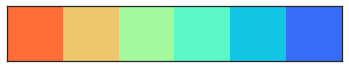

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Sun Aug 16 17:10:53 2020

@author: wanxiang.shen@u.nus.edu
"""

import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import auc as calculate_auc

import matplotlib.pyplot as plt
import seaborn as sns

from aggmap import AggMap, AggModel

np.random.seed(666) #just for reaptable results


color = sns.color_palette("rainbow_r", 6) #PiYG
sns.palplot(color)

In [8]:
dfx  = pd.read_excel('./COVID19.xlsx', sheet_name='data')
dfy  = pd.read_excel('./COVID19.xlsx', sheet_name='sample_info')

dfx = dfx[dfx.columns[1:]]
cols = ["p-%s" % c for c in dfx.columns]
dfx.columns = cols

X = dfx.values
Y = pd.get_dummies(dfy['class']).values.astype(float)

mp = AggMap(dfx, metric = 'correlation')

2020-10-25 15:00:30,354 - INFO - [bidd-aggmap] - Calculating distance ...
2020-10-25 15:00:30,354 - INFO - [bidd-aggmap] - the number of process is 16


100%|##########| 88/88 [00:00<00:00, 756.39it/s]


## 5-fold cross validation and repeat 5 times 

In [9]:
n_splits = 5 #5-fold reapeat 5 times

run_all = []

for repeat_seed in [8, 16, 32, 64, 128]: #5 repeats random seeds
    outer = KFold(n_splits = n_splits, shuffle = True, random_state = repeat_seed)
    outer_idx = list(outer.split(range(len(Y))))
    
    for c in [1, 3, 5]: 
        
        mp = mp.fit(cluster_channels = c, verbose = 0)
        for i, idx in enumerate(outer_idx):
            
            train_idx, valid_idx = idx
            fold_num = "fold_%s" % str(i+1).zfill(2) 
            
            validY = Y[valid_idx]
            validx = X[valid_idx]

            trainx = X[train_idx]
            trainY = Y[train_idx]

            trainX = mp.batch_transform(trainx, scale_method = 'standard')
            validX = mp.batch_transform(validx, scale_method = 'standard')
            print("\n input train and test X shape is %s, %s " % (trainX.shape,  validX.shape))
            clf = AggModel.MultiClassEstimator(epochs = 50,  
                                               batch_size = 4,
                                               verbose = 0, gpuid=1)
            clf.fit(trainX, trainY, X_valid = validX, y_valid = validY)

            history = clf.history.history
            history['fold'] = fold_num
            history['c'] = c
            history['repeat_seed'] = repeat_seed
            
            run_all.append(history)

  0%|          | 0/289 [00:00<?, ?it/s]

2020-10-25 15:00:32,254 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 15:00:32,434 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-10-25 15:00:32,444 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 1592.49it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 73/73 [00:00<00:00, 1612.12it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1394.75it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 2003.12it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1500.41it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


  0%|          | 0/289 [00:00<?, ?it/s]

2020-10-25 15:02:36,139 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 15:02:36,321 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-10-25 15:02:36,332 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 1659.43it/s]



 input train and test X shape is (289, 10, 9, 3), (73, 10, 9, 3) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 73/73 [00:00<00:00, 1632.17it/s]



 input train and test X shape is (289, 10, 9, 3), (73, 10, 9, 3) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1407.64it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1664.97it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1336.30it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')
2020-10-25 15:04:37,788 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 15:04:37,976 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)


100%|##########| 289/289 [00:00<00:00, 1673.56it/s]

2020-10-25 15:04:37,990 - INFO - [bidd-aggmap] - Finished



100%|##########| 73/73 [00:00<00:00, 1741.36it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 73/73 [00:00<00:00, 1356.36it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1795.98it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1750.37it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1203.72it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


  0%|          | 0/289 [00:00<?, ?it/s]

2020-10-25 15:06:39,109 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 15:06:39,288 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-10-25 15:06:39,298 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 1593.27it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 73/73 [00:00<00:00, 1712.09it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1521.88it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1521.50it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1686.31it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')
2020-10-25 15:08:40,151 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 15:08:40,349 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)


 22%|##2       | 64/289 [00:00<00:00, 586.89it/s]

2020-10-25 15:08:40,363 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 1695.32it/s]



 input train and test X shape is (289, 10, 9, 3), (73, 10, 9, 3) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 73/73 [00:00<00:00, 1810.79it/s]



 input train and test X shape is (289, 10, 9, 3), (73, 10, 9, 3) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1762.98it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1682.38it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1741.26it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


  0%|          | 0/289 [00:00<?, ?it/s]

2020-10-25 15:10:41,087 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 15:10:41,267 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-10-25 15:10:41,280 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 1416.57it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 73/73 [00:00<00:00, 1725.68it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1239.99it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1479.96it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 2042.80it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


  0%|          | 0/289 [00:00<?, ?it/s]

2020-10-25 15:12:42,348 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 15:12:42,528 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-10-25 15:12:42,539 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 1839.98it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 73/73 [00:00<00:00, 1420.97it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1567.85it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1772.19it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1785.50it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')
2020-10-25 15:14:42,974 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 15:14:43,164 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-10-25 15:14:43,175 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 1285.44it/s]



 input train and test X shape is (289, 10, 9, 3), (73, 10, 9, 3) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 73/73 [00:00<00:00, 1749.49it/s]



 input train and test X shape is (289, 10, 9, 3), (73, 10, 9, 3) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 2040.32it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1685.75it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1010.23it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


  0%|          | 0/289 [00:00<?, ?it/s]

2020-10-25 15:16:44,254 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 15:16:44,435 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-10-25 15:16:44,448 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 1648.18it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 73/73 [00:00<00:00, 1124.99it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 2160.82it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1296.02it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1512.93it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


  0%|          | 0/289 [00:00<?, ?it/s]

2020-10-25 15:18:46,082 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 15:18:46,264 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-10-25 15:18:46,274 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 1869.04it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 73/73 [00:00<00:00, 1597.45it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1429.80it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1801.62it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1469.22it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


  0%|          | 0/289 [00:00<?, ?it/s]

2020-10-25 15:20:46,594 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 15:20:46,775 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-10-25 15:20:46,786 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 2184.94it/s]



 input train and test X shape is (289, 10, 9, 3), (73, 10, 9, 3) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 73/73 [00:00<00:00, 1427.80it/s]



 input train and test X shape is (289, 10, 9, 3), (73, 10, 9, 3) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1512.85it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1688.07it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1448.62it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


  0%|          | 0/289 [00:00<?, ?it/s]

2020-10-25 15:22:47,977 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 15:22:48,164 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-10-25 15:22:48,177 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 1599.78it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 73/73 [00:00<00:00, 1498.88it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1029.90it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1577.68it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1499.01it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


  0%|          | 0/289 [00:00<?, ?it/s]

2020-10-25 15:24:49,390 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 15:24:49,571 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-10-25 15:24:49,580 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 2325.50it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 73/73 [00:00<00:00, 1644.72it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1033.10it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1678.73it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1440.97it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


  0%|          | 0/289 [00:00<?, ?it/s]

2020-10-25 15:26:50,276 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 15:26:50,456 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-10-25 15:26:50,468 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 1487.25it/s]



 input train and test X shape is (289, 10, 9, 3), (73, 10, 9, 3) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 73/73 [00:00<00:00, 1698.20it/s]



 input train and test X shape is (289, 10, 9, 3), (73, 10, 9, 3) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 2095.93it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1778.05it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1378.54it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


  0%|          | 0/289 [00:00<?, ?it/s]

2020-10-25 15:28:49,736 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 15:28:49,915 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-10-25 15:28:49,929 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 1519.70it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 73/73 [00:00<00:00, 1726.99it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1990.35it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1715.42it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


100%|##########| 72/72 [00:00<00:00, 1247.69it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=4, epochs=50, gpuid='1')


In [10]:
dfr = pd.DataFrame(run_all)
dfr.to_csv('./5FCV_valid.csv')

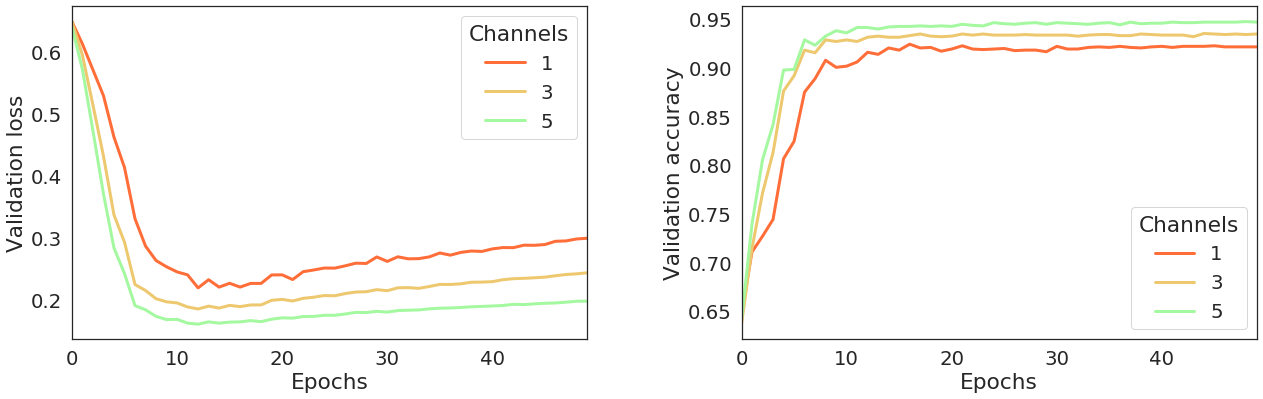

In [26]:
sns.set(style = 'white', font_scale=1.8)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6), sharex=False, sharey=False, )
ax1, ax2 = axes        


col = 'val_loss'
loss_mean = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).mean(axis=0)).apply(pd.Series).T
loss_std = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).std(axis=0)).apply(pd.Series).T

loss_mean.columns.name = 'Channels'
loss_std.columns.name = 'Channels'

loss_mean.plot(ax=ax1, lw = 3, color = color)
ax1.set_ylabel('Validation loss')
ax1.set_xlabel('Epochs')

# for i, j in zip(loss_mean.columns, color[:3]):
#     bottom = loss_mean[i]-loss_std[i]
#     up = loss_mean[i] + loss_std[i]
#     ax1.fill_between(loss_mean.index, bottom, up,alpha=0.2, color = j)

#plt.savefig(os.path.join(results_save_folder, 'performance_01_test.png'), bbox_inches='tight', dpi=300)

col = 'val_accuracy'
acc_mean = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).mean(axis=0)).apply(pd.Series).T
acc_std = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).std(axis=0)).apply(pd.Series).T


acc_mean.columns.name = 'Channels'
acc_std.columns.name = 'Channels'

acc_mean.plot(ax=ax2, lw = 3, color = color)
ax2.set_ylabel('Validation accuracy')
ax2.set_xlabel('Epochs')

fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3)
plt.savefig('5FCV_valid.png', bbox_inches='tight', dpi=400)

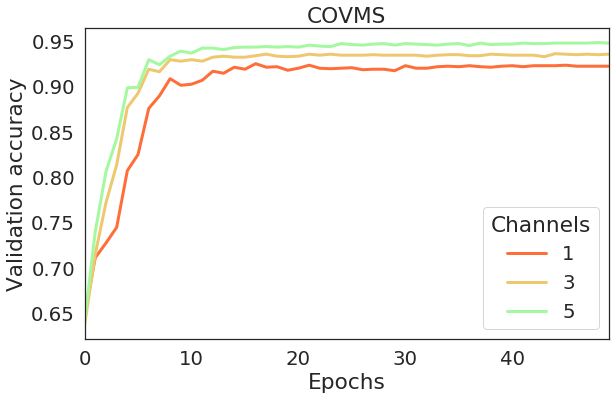

In [30]:
sns.set(style = 'white', font_scale=1.8)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9,6), sharex=False, sharey=False, )
ax2 = axes        

col = 'val_accuracy'
acc_mean = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).mean(axis=0)).apply(pd.Series).T
acc_std = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).std(axis=0)).apply(pd.Series).T


acc_mean.columns.name = 'Channels'
acc_std.columns.name = 'Channels'

acc_mean.plot(ax=ax2, lw = 3, color = color)
ax2.set_ylabel('Validation accuracy')
ax2.set_xlabel('Epochs')
plt.title('COVMS')
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3)
plt.savefig('5FCV_valid_acc.png', bbox_inches='tight', dpi=400)